In [1]:
import os
import pandas as pd
import numpy as np
import datetime

pd.set_option('display.max_columns', 100)

In [2]:
os.chdir('..')

In [3]:
!pwd

/Users/A.IVA/Documents/jupyter_notebooks/rest/coursera_and_blogs/time_series


In [4]:
from ts_utils.preprocess import *

### 1 Load data

In [7]:
data_dir = os.path.join('data', 'rossmann-store-sales')
dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d')

df_store = pd.read_csv( os.path.join(data_dir, 'store.csv'))

df_train = pd.read_csv( os.path.join(data_dir, 'train.csv'), parse_dates=[2], low_memory=False, )
df_test = pd.read_csv( os.path.join(data_dir, 'test.csv'), parse_dates=[3], date_parser=dateparse)

### 2 Data preprocessing

In [11]:
df_store = preprocess_store_data(df_store)
df_train, df_test = preprocess_train_test_data(df_train, df_test, df_store)

In [12]:
display(df_train.head(2))
display(df_test.head(2))
display(df_train.dtypes)
display(df_test.dtypes)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Promo2Since,CompetitionSince,dtLastProm,dtCompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,[],NaT,2008-09-01,None,2524
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,"[1, 4, 7, 10]",2010-04-01,2007-11-01,30,2829


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Promo2Since,CompetitionSince,dtLastProm,dtCompetitionOpen
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,0,[],NaT,2008-09-01,None,2572
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,1,"[1, 4, 7, 10]",2011-04-01,2006-12-01,78,3212


Store                           int64
DayOfWeek                       int64
Date                   datetime64[ns]
Sales                           int64
Customers                       int64
Open                            int64
Promo                           int64
StateHoliday                   object
SchoolHoliday                   int64
StoreType                      object
Assortment                     object
CompetitionDistance           float64
Promo2                          int64
PromoInterval                  object
Promo2Since            datetime64[ns]
CompetitionSince       datetime64[ns]
dtLastProm                     object
dtCompetitionOpen              object
dtype: object

Id                              int64
Store                           int64
DayOfWeek                       int64
Date                   datetime64[ns]
Open                          float64
Promo                           int64
StateHoliday                   object
SchoolHoliday                   int64
StoreType                      object
Assortment                     object
CompetitionDistance           float64
Promo2                          int64
PromoInterval                  object
Promo2Since            datetime64[ns]
CompetitionSince       datetime64[ns]
dtLastProm                     object
dtCompetitionOpen              object
dtype: object

In [13]:
df_train.to_csv(os.path.join(data_dir, 'train_trf.csv'), index=False)
df_test.to_csv(os.path.join(data_dir, 'test_trf.csv'), index=False)

### 3 Load preprocessed data and ...

In [10]:
from ast import literal_eval

data_dir = os.path.join('data', 'rossmann-store-sales')

df_train = pd.read_csv(os.path.join(data_dir, 'train_trf.csv'), low_memory=False)
df_test = pd.read_csv(os.path.join(data_dir, 'test_trf.csv'), low_memory=False)


for df in [df_train, df_test]:
    df['Date'] = pd.to_datetime(df['Date'])
    df['CompetitionSince'] = pd.to_datetime(df['CompetitionSince'])
    df['Promo2Since'] = pd.to_datetime(df['Promo2Since'])
    df['PromoInterval'] = df['PromoInterval'].apply(lambda x: literal_eval(x))
    
    date_cols = ['Date', 'Promo2Since', 'CompetitionSince']
    non_date_cols = [el for el in list(df.columns.values) if el not in date_cols]
    
    #     dict_1 = dict((k,-1) for k in non_date_cols)
    #     dict_2 = dict((k,pd.NaT) for k in date_cols)
    #     dict_1.update(dict_2)
        
    #     df.fillna(dict_1, inplace=True)    

In [11]:
df_test.head(3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Promo2Since,CompetitionSince,dtLastProm,dtCompetitionOpen
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,0,[],NaT,2008-09-01,NaN,2572.0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,1,"[1, 4, 7, 10]",2011-04-01,2006-12-01,78.0,3212.0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,0,[],NaT,2013-04-01,NaN,899.0


In [12]:
# check the number of NaNs in the data
display(df_train.isnull().sum(axis = 0))
display(df_test.isnull().sum(axis = 0))

Store                       0
DayOfWeek                   0
Date                        0
Sales                       0
Customers                   0
Open                        0
Promo                       0
StateHoliday                0
SchoolHoliday               0
StoreType                   0
Assortment                  0
CompetitionDistance      2642
Promo2                      0
PromoInterval               0
Promo2Since            508031
CompetitionSince       323348
dtLastProm             580269
dtCompetitionOpen      323348
dtype: int64

Id                         0
Store                      0
DayOfWeek                  0
Date                       0
Open                       0
Promo                      0
StateHoliday               0
SchoolHoliday              0
StoreType                  0
Assortment                 0
CompetitionDistance       96
Promo2                     0
PromoInterval              0
Promo2Since            17232
CompetitionSince       15216
dtLastProm             17232
dtCompetitionOpen      15216
dtype: int64

### 4 Train Validation Test splitting

In [13]:
# only use data of Sales>0 and Open is 1
df_train = df_train[(df_train['Open'] != 0) & (df_train['Sales'] != 0)]

# take last two months as validation
df_val = df_train[df_train['Date']>='2015-06-01'].copy(deep=True)
df_train = df_train[df_train['Date']<'2015-06-01'].copy(deep=True)

In [14]:
# Store	 # a categorical variable (should we use it? TODO)
# DayOfWeek	# used in encoder
# Date	
# Sales	     # we have to predict it
# Customers	 # not present in test data
# Open	   # it is equal to 1 for the entire training set
# Promo	   # used
# StateHoliday	# used in encoder
# SchoolHoliday	# used in encoder
# StoreType	# used in encoder
# Assortment	# used in encoder
# CompetitionDistance	# used
# Promo2	        # used
# PromoInterval	# do not use
# Promo2Since	    # used
# CompetitionSince	
# dtLastProm # used
# dtCompetitionOpen # used

# fillna of 
#     CompetitionDistance,  OK
#     dtLastProm, OK
#     dtCompetitionOpen OK 
#     Promo2Since 
#     CompetitionSince

### 5 Pipeline generation & train model

##### 5.1 pipeline creation

In [15]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder, OneHotEncoder


def get_col(X=None, **kv):
    relevant_columns = kv['relevant_columns']
    copy_ = kv.get('copy')
    if copy_ == True:
        return X[relevant_columns].copy(deep=True).values
    else:
        return X[relevant_columns].values

# use Store ?
categorical_columns = ['DayOfWeek','StateHoliday','SchoolHoliday','StoreType','Assortment']

# include also columns that can be only equal to 0/1
other_columns = ['Store', 'Promo', 'Promo2']


competition_distance = Pipeline([
    ('my_col_selector', FunctionTransformer(get_col, validate=False, kw_args={'relevant_columns': ['CompetitionDistance']})),    
    ('my_imputer', SimpleImputer(strategy='constant', copy=False, fill_value=-1)),
    ('my_scaler', StandardScaler(with_mean=True, with_std=True))
])

dt_last_prom = Pipeline([
    ('my_col_selector', FunctionTransformer(get_col, validate=False, kw_args={'relevant_columns': ['dtLastProm']})),
    ('my_imputer', SimpleImputer(strategy='constant', copy=False, fill_value=-30)),
    ('my_scaler', StandardScaler(with_mean=True, with_std=True))
])

dt_competition_open = Pipeline([
    ('my_col_selector', FunctionTransformer(get_col, validate=False, kw_args={'relevant_columns': ['dtCompetitionOpen']})),
    ('my_imputer', SimpleImputer(strategy='constant', copy=False, fill_value=-30)),
    ('my_scaler', StandardScaler(with_mean=True, with_std=True))
])

oh_encoder = Pipeline([
    ('my_col_selector', FunctionTransformer(get_col, validate=False, kw_args={'relevant_columns': categorical_columns})),
    ('my_ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# combine all transformers
pipe_union = FeatureUnion([
    ('my_oh_encoder', oh_encoder),
    ('my_competition_distance', competition_distance),
    ('my_dt_last_prom', dt_last_prom),
    ('my_dt_competition_open', dt_competition_open),
    ('my_other_columns', FunctionTransformer(get_col, validate=False, kw_args={'relevant_columns': other_columns}))
])


pipe_y = Pipeline([
    ('my_log1p_scaler', FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=False)),
    ('my_std_scaler', StandardScaler(with_mean=True, with_std=True))
])

##### 5.2 train model

In [16]:
pipe_union.fit(df_train)
pipe_y.fit(df_train[['Sales']])

X_train = pipe_union.transform(df_train)
X_val = pipe_union.transform(df_val)

Y_train = pipe_y.transform(df_train[['Sales']])
Y_val  = pipe_y.transform(df_val[['Sales']])

# pipe_union.get_params()
# tmp = oh_encoder.get_params()['my_weekday_encoder']df_test['dtCompetitionOpen']

In [17]:
import itertools
from ts_utils.pipeline_utils import * 

pipelines = get_pipelines(pipe_union)
columns = list(map(lambda x: get_columns_from_pipeline(x), pipelines)) 
columns = list(itertools.chain(*columns))

In [18]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = pipe_y.inverse_transform(y.get_label())
    yhat = pipe_y.inverse_transform(yhat)
    return "rmspe", rmspe(y, yhat)

In [19]:
import xgboost as xgb
from time import time

params = {
    "objective": "reg:linear", # reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic classification problems with probability 
    "booster" : "gbtree", # All you have to do is set the booster parameter to either gbtree (default), gblinear or dart.
    "eta": 0.03,
    "max_depth": 10,
    "subsample": 0.9,
    "colsample_bytree": 0.7,
    "silent": 1,
    "seed": 10
    }

# gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
# alpha: L1 regularization on leaf weights. A large value leads to more regularization.
# lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

# XGBoost's relatively less popular linear base learners and one other tree learner known as dart. 
# All you have to do is set the booster parameter to either gbtree (default), gblinear or dart.

# n_estimators = number of trees to build

# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)

num_boost_round = 6000

dtrain = xgb.DMatrix(data=X_train, label=Y_train, feature_names=columns)
dvalid = xgb.DMatrix(X_val, Y_val, feature_names=columns)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]


print("Train a XGBoost model")
start = time()
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, 
      early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)
end = time()
print('Training time is {:2f} s.'.format(end-start))

Train a XGBoost model
[0]	train-rmse:1.10288	eval-rmse:1.04523	train-rmspe:0.753495	eval-rmspe:0.659591
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:1.08708	eval-rmse:1.02991	train-rmspe:0.736302	eval-rmspe:0.643432
[2]	train-rmse:1.07344	eval-rmse:1.01636	train-rmspe:0.721683	eval-rmspe:0.629743
[3]	train-rmse:1.06101	eval-rmse:1.0045	train-rmspe:0.707104	eval-rmspe:0.616298
[4]	train-rmse:1.04554	eval-rmse:0.989332	train-rmspe:0.690406	eval-rmspe:0.601132
[5]	train-rmse:1.03096	eval-rmse:0.974576	train-rmspe:0.675777	eval-rmspe:0.587014
[6]	train-rmse:1.01826	eval-rmse:0.96268	train-rmspe:0.663896	eval-rmspe:0.575757
[7]	train-rmse:1.00463	eval-rmse:0.949063	train-rmspe:0.65074	eval-rmspe:0.56305
[8]	train-rmse:0.994969	eval-rmse:0.939976	train-rmspe:0.639548	eval-rmspe:0.552431
[9]	train-rmse:0.984206	eval-rmse:0.929814	train-rmspe:0.627769	eval-rmspe:0.541649
[10]	tra

[96]	train-rmse:0.629179	eval-rmse:0.596423	train-rmspe:0.329775	eval-rmspe:0.266958
[97]	train-rmse:0.627917	eval-rmse:0.59565	train-rmspe:0.328995	eval-rmspe:0.266434
[98]	train-rmse:0.626215	eval-rmse:0.594106	train-rmspe:0.328039	eval-rmspe:0.265483
[99]	train-rmse:0.624552	eval-rmse:0.59265	train-rmspe:0.327055	eval-rmspe:0.264605
[100]	train-rmse:0.623373	eval-rmse:0.59185	train-rmspe:0.326221	eval-rmspe:0.264065
[101]	train-rmse:0.622213	eval-rmse:0.590915	train-rmspe:0.325502	eval-rmspe:0.263459
[102]	train-rmse:0.621525	eval-rmse:0.59065	train-rmspe:0.325007	eval-rmspe:0.263256
[103]	train-rmse:0.620139	eval-rmse:0.589595	train-rmspe:0.324176	eval-rmspe:0.26256
[104]	train-rmse:0.618856	eval-rmse:0.588548	train-rmspe:0.323388	eval-rmspe:0.261915
[105]	train-rmse:0.615082	eval-rmse:0.584906	train-rmspe:0.321401	eval-rmspe:0.259963
[106]	train-rmse:0.612033	eval-rmse:0.582066	train-rmspe:0.319948	eval-rmspe:0.258534
[107]	train-rmse:0.611323	eval-rmse:0.581513	train-rmspe:0.3195

[192]	train-rmse:0.528803	eval-rmse:0.507479	train-rmspe:0.279756	eval-rmspe:0.220925
[193]	train-rmse:0.527234	eval-rmse:0.506004	train-rmspe:0.279091	eval-rmspe:0.220292
[194]	train-rmse:0.527072	eval-rmse:0.505859	train-rmspe:0.279064	eval-rmspe:0.220239
[195]	train-rmse:0.525456	eval-rmse:0.504202	train-rmspe:0.278361	eval-rmspe:0.219497
[196]	train-rmse:0.524353	eval-rmse:0.503177	train-rmspe:0.277898	eval-rmspe:0.219042
[197]	train-rmse:0.523055	eval-rmse:0.501855	train-rmspe:0.277359	eval-rmspe:0.21845
[198]	train-rmse:0.522556	eval-rmse:0.501517	train-rmspe:0.277081	eval-rmspe:0.218328
[199]	train-rmse:0.521741	eval-rmse:0.500866	train-rmspe:0.276723	eval-rmspe:0.218058
[200]	train-rmse:0.521166	eval-rmse:0.500255	train-rmspe:0.276446	eval-rmspe:0.217795
[201]	train-rmse:0.519385	eval-rmse:0.49851	train-rmspe:0.275684	eval-rmspe:0.217024
[202]	train-rmse:0.518692	eval-rmse:0.497918	train-rmspe:0.275385	eval-rmspe:0.216744
[203]	train-rmse:0.517695	eval-rmse:0.497005	train-rmspe

[288]	train-rmse:0.456209	eval-rmse:0.438642	train-rmspe:0.246137	eval-rmspe:0.190822
[289]	train-rmse:0.455002	eval-rmse:0.437384	train-rmspe:0.245528	eval-rmspe:0.19024
[290]	train-rmse:0.454364	eval-rmse:0.436903	train-rmspe:0.245293	eval-rmspe:0.190056
[291]	train-rmse:0.454107	eval-rmse:0.436905	train-rmspe:0.245181	eval-rmspe:0.190094
[292]	train-rmse:0.453851	eval-rmse:0.43693	train-rmspe:0.245111	eval-rmspe:0.190115
[293]	train-rmse:0.453545	eval-rmse:0.436937	train-rmspe:0.244975	eval-rmspe:0.190165
[294]	train-rmse:0.453329	eval-rmse:0.436776	train-rmspe:0.244934	eval-rmspe:0.190088
[295]	train-rmse:0.452836	eval-rmse:0.43635	train-rmspe:0.244729	eval-rmspe:0.18987
[296]	train-rmse:0.45194	eval-rmse:0.435512	train-rmspe:0.24432	eval-rmspe:0.189535
[297]	train-rmse:0.451428	eval-rmse:0.43504	train-rmspe:0.244108	eval-rmspe:0.18931
[298]	train-rmse:0.450541	eval-rmse:0.434145	train-rmspe:0.243697	eval-rmspe:0.188896
[299]	train-rmse:0.450161	eval-rmse:0.433738	train-rmspe:0.243

[384]	train-rmse:0.410475	eval-rmse:0.397266	train-rmspe:0.223703	eval-rmspe:0.173049
[385]	train-rmse:0.410366	eval-rmse:0.397148	train-rmspe:0.223775	eval-rmspe:0.172995
[386]	train-rmse:0.409884	eval-rmse:0.396801	train-rmspe:0.223541	eval-rmspe:0.172859
[387]	train-rmse:0.409376	eval-rmse:0.396438	train-rmspe:0.223307	eval-rmspe:0.172664
[388]	train-rmse:0.409322	eval-rmse:0.396377	train-rmspe:0.223296	eval-rmspe:0.172641
[389]	train-rmse:0.40885	eval-rmse:0.395844	train-rmspe:0.223105	eval-rmspe:0.172378
[390]	train-rmse:0.408247	eval-rmse:0.395459	train-rmspe:0.222844	eval-rmspe:0.172234
[391]	train-rmse:0.407617	eval-rmse:0.39477	train-rmspe:0.222585	eval-rmspe:0.171897
[392]	train-rmse:0.40692	eval-rmse:0.394275	train-rmspe:0.222357	eval-rmspe:0.171707
[393]	train-rmse:0.406813	eval-rmse:0.394263	train-rmspe:0.222324	eval-rmspe:0.171702
[394]	train-rmse:0.406558	eval-rmse:0.394076	train-rmspe:0.222224	eval-rmspe:0.17161
[395]	train-rmse:0.406151	eval-rmse:0.393678	train-rmspe:0

[480]	train-rmse:0.378997	eval-rmse:0.369282	train-rmspe:0.211058	eval-rmspe:0.161149
[481]	train-rmse:0.378708	eval-rmse:0.369053	train-rmspe:0.21095	eval-rmspe:0.161065
[482]	train-rmse:0.378533	eval-rmse:0.369038	train-rmspe:0.210883	eval-rmspe:0.16107
[483]	train-rmse:0.378098	eval-rmse:0.368614	train-rmspe:0.210715	eval-rmspe:0.160905
[484]	train-rmse:0.377921	eval-rmse:0.36847	train-rmspe:0.210655	eval-rmspe:0.160848
[485]	train-rmse:0.377611	eval-rmse:0.368122	train-rmspe:0.210536	eval-rmspe:0.160682
[486]	train-rmse:0.377423	eval-rmse:0.367946	train-rmspe:0.210466	eval-rmspe:0.160609
[487]	train-rmse:0.377392	eval-rmse:0.367927	train-rmspe:0.210461	eval-rmspe:0.160601
[488]	train-rmse:0.377318	eval-rmse:0.367862	train-rmspe:0.210437	eval-rmspe:0.160577
[489]	train-rmse:0.377072	eval-rmse:0.36776	train-rmspe:0.210352	eval-rmspe:0.160535
[490]	train-rmse:0.376994	eval-rmse:0.367705	train-rmspe:0.210344	eval-rmspe:0.160509
[491]	train-rmse:0.376887	eval-rmse:0.367604	train-rmspe:0

[576]	train-rmse:0.363304	eval-rmse:0.356354	train-rmspe:0.204649	eval-rmspe:0.155697
[577]	train-rmse:0.363116	eval-rmse:0.356171	train-rmspe:0.204571	eval-rmspe:0.155605
[578]	train-rmse:0.362999	eval-rmse:0.356031	train-rmspe:0.204522	eval-rmspe:0.155546
[579]	train-rmse:0.36294	eval-rmse:0.355979	train-rmspe:0.204534	eval-rmspe:0.15553
[580]	train-rmse:0.362925	eval-rmse:0.35597	train-rmspe:0.204518	eval-rmspe:0.155527
[581]	train-rmse:0.362852	eval-rmse:0.355884	train-rmspe:0.204488	eval-rmspe:0.155485
[582]	train-rmse:0.362614	eval-rmse:0.355762	train-rmspe:0.204405	eval-rmspe:0.155429
[583]	train-rmse:0.362314	eval-rmse:0.355574	train-rmspe:0.204295	eval-rmspe:0.155341
[584]	train-rmse:0.362132	eval-rmse:0.355366	train-rmspe:0.20423	eval-rmspe:0.155246
[585]	train-rmse:0.362077	eval-rmse:0.355389	train-rmspe:0.204207	eval-rmspe:0.155269
[586]	train-rmse:0.362013	eval-rmse:0.355339	train-rmspe:0.204183	eval-rmspe:0.155241
[587]	train-rmse:0.361676	eval-rmse:0.355104	train-rmspe:0

[672]	train-rmse:0.351715	eval-rmse:0.347512	train-rmspe:0.200483	eval-rmspe:0.152019
[673]	train-rmse:0.351614	eval-rmse:0.347387	train-rmspe:0.20044	eval-rmspe:0.151969
[674]	train-rmse:0.351547	eval-rmse:0.34739	train-rmspe:0.200405	eval-rmspe:0.151973
[675]	train-rmse:0.351405	eval-rmse:0.347294	train-rmspe:0.200348	eval-rmspe:0.15192
[676]	train-rmse:0.351283	eval-rmse:0.347158	train-rmspe:0.200306	eval-rmspe:0.151856
[677]	train-rmse:0.351251	eval-rmse:0.347121	train-rmspe:0.200294	eval-rmspe:0.151839
[678]	train-rmse:0.351067	eval-rmse:0.346992	train-rmspe:0.200211	eval-rmspe:0.151778
[679]	train-rmse:0.350968	eval-rmse:0.346962	train-rmspe:0.200173	eval-rmspe:0.15177
[680]	train-rmse:0.350764	eval-rmse:0.34675	train-rmspe:0.20009	eval-rmspe:0.151667
[681]	train-rmse:0.350716	eval-rmse:0.346726	train-rmspe:0.200073	eval-rmspe:0.151658
[682]	train-rmse:0.350658	eval-rmse:0.346705	train-rmspe:0.200061	eval-rmspe:0.151648
[683]	train-rmse:0.35056	eval-rmse:0.346609	train-rmspe:0.20

[768]	train-rmse:0.341193	eval-rmse:0.340746	train-rmspe:0.196662	eval-rmspe:0.149208
[769]	train-rmse:0.341062	eval-rmse:0.340719	train-rmspe:0.196593	eval-rmspe:0.1492
[770]	train-rmse:0.340998	eval-rmse:0.340655	train-rmspe:0.19657	eval-rmspe:0.149172
[771]	train-rmse:0.340911	eval-rmse:0.34065	train-rmspe:0.196536	eval-rmspe:0.149173
[772]	train-rmse:0.340853	eval-rmse:0.340611	train-rmspe:0.196517	eval-rmspe:0.149157
[773]	train-rmse:0.340676	eval-rmse:0.340451	train-rmspe:0.196477	eval-rmspe:0.149086
[774]	train-rmse:0.340619	eval-rmse:0.340391	train-rmspe:0.196447	eval-rmspe:0.149052
[775]	train-rmse:0.340578	eval-rmse:0.340383	train-rmspe:0.196435	eval-rmspe:0.149053
[776]	train-rmse:0.34056	eval-rmse:0.340387	train-rmspe:0.196429	eval-rmspe:0.149056
[777]	train-rmse:0.340401	eval-rmse:0.340259	train-rmspe:0.196352	eval-rmspe:0.148994
[778]	train-rmse:0.34033	eval-rmse:0.340236	train-rmspe:0.196324	eval-rmspe:0.148988
[779]	train-rmse:0.340073	eval-rmse:0.34004	train-rmspe:0.19

[864]	train-rmse:0.333827	eval-rmse:0.336429	train-rmspe:0.193797	eval-rmspe:0.147466
[865]	train-rmse:0.333771	eval-rmse:0.336425	train-rmspe:0.193777	eval-rmspe:0.147467
[866]	train-rmse:0.333723	eval-rmse:0.336387	train-rmspe:0.193763	eval-rmspe:0.147448
[867]	train-rmse:0.333689	eval-rmse:0.336359	train-rmspe:0.193752	eval-rmspe:0.147433
[868]	train-rmse:0.333545	eval-rmse:0.336219	train-rmspe:0.193698	eval-rmspe:0.147367
[869]	train-rmse:0.333537	eval-rmse:0.336218	train-rmspe:0.193696	eval-rmspe:0.147365
[870]	train-rmse:0.333402	eval-rmse:0.336159	train-rmspe:0.193641	eval-rmspe:0.147341
[871]	train-rmse:0.33336	eval-rmse:0.336116	train-rmspe:0.193618	eval-rmspe:0.147319
[872]	train-rmse:0.333246	eval-rmse:0.336095	train-rmspe:0.193581	eval-rmspe:0.147316
[873]	train-rmse:0.333157	eval-rmse:0.33606	train-rmspe:0.193549	eval-rmspe:0.147313
[874]	train-rmse:0.333113	eval-rmse:0.336058	train-rmspe:0.193518	eval-rmspe:0.147313
[875]	train-rmse:0.33308	eval-rmse:0.336101	train-rmspe:

[960]	train-rmse:0.326941	eval-rmse:0.333048	train-rmspe:0.191277	eval-rmspe:0.146211
[961]	train-rmse:0.326925	eval-rmse:0.333054	train-rmspe:0.191268	eval-rmspe:0.146215
[962]	train-rmse:0.326855	eval-rmse:0.333058	train-rmspe:0.191241	eval-rmspe:0.146228
[963]	train-rmse:0.326812	eval-rmse:0.333056	train-rmspe:0.19122	eval-rmspe:0.146228
[964]	train-rmse:0.326761	eval-rmse:0.332992	train-rmspe:0.1912	eval-rmspe:0.146203
[965]	train-rmse:0.326687	eval-rmse:0.33298	train-rmspe:0.191174	eval-rmspe:0.146195
[966]	train-rmse:0.326599	eval-rmse:0.332971	train-rmspe:0.191146	eval-rmspe:0.146194
[967]	train-rmse:0.326524	eval-rmse:0.332952	train-rmspe:0.191119	eval-rmspe:0.146185
[968]	train-rmse:0.326461	eval-rmse:0.332883	train-rmspe:0.191097	eval-rmspe:0.146148
[969]	train-rmse:0.326445	eval-rmse:0.332883	train-rmspe:0.19109	eval-rmspe:0.146149
[970]	train-rmse:0.326403	eval-rmse:0.332833	train-rmspe:0.191074	eval-rmspe:0.146124
[971]	train-rmse:0.32635	eval-rmse:0.332838	train-rmspe:0.1

[1056]	train-rmse:0.321677	eval-rmse:0.330943	train-rmspe:0.187717	eval-rmspe:0.145396
[1057]	train-rmse:0.321593	eval-rmse:0.330878	train-rmspe:0.187629	eval-rmspe:0.145364
[1058]	train-rmse:0.321558	eval-rmse:0.330869	train-rmspe:0.187616	eval-rmspe:0.145359
[1059]	train-rmse:0.321505	eval-rmse:0.33081	train-rmspe:0.187598	eval-rmspe:0.145332
[1060]	train-rmse:0.321479	eval-rmse:0.330817	train-rmspe:0.18759	eval-rmspe:0.145336
[1061]	train-rmse:0.321443	eval-rmse:0.330797	train-rmspe:0.187577	eval-rmspe:0.145333
[1062]	train-rmse:0.321373	eval-rmse:0.330733	train-rmspe:0.187551	eval-rmspe:0.145308
[1063]	train-rmse:0.321322	eval-rmse:0.33073	train-rmspe:0.187532	eval-rmspe:0.14531
[1064]	train-rmse:0.321259	eval-rmse:0.330699	train-rmspe:0.187502	eval-rmspe:0.145299
[1065]	train-rmse:0.321204	eval-rmse:0.330656	train-rmspe:0.187483	eval-rmspe:0.145284
[1066]	train-rmse:0.321154	eval-rmse:0.330653	train-rmspe:0.187466	eval-rmspe:0.145283
[1067]	train-rmse:0.321078	eval-rmse:0.330605	t

[1151]	train-rmse:0.31675	eval-rmse:0.328861	train-rmspe:0.185297	eval-rmspe:0.144623
[1152]	train-rmse:0.316737	eval-rmse:0.328865	train-rmspe:0.185292	eval-rmspe:0.144626
[1153]	train-rmse:0.316685	eval-rmse:0.328844	train-rmspe:0.18527	eval-rmspe:0.14462
[1154]	train-rmse:0.316616	eval-rmse:0.328834	train-rmspe:0.185203	eval-rmspe:0.14462
[1155]	train-rmse:0.31657	eval-rmse:0.32883	train-rmspe:0.185185	eval-rmspe:0.14462
[1156]	train-rmse:0.316554	eval-rmse:0.328814	train-rmspe:0.185181	eval-rmspe:0.144614
[1157]	train-rmse:0.316471	eval-rmse:0.328749	train-rmspe:0.185148	eval-rmspe:0.144587
[1158]	train-rmse:0.316392	eval-rmse:0.328706	train-rmspe:0.18512	eval-rmspe:0.144572
[1159]	train-rmse:0.316339	eval-rmse:0.328718	train-rmspe:0.185105	eval-rmspe:0.144579
[1160]	train-rmse:0.316308	eval-rmse:0.328685	train-rmspe:0.185094	eval-rmspe:0.144563
[1161]	train-rmse:0.316271	eval-rmse:0.328667	train-rmspe:0.185082	eval-rmspe:0.144553
[1162]	train-rmse:0.316201	eval-rmse:0.328628	train

[1246]	train-rmse:0.31199	eval-rmse:0.32691	train-rmspe:0.18311	eval-rmspe:0.143868
[1247]	train-rmse:0.311956	eval-rmse:0.326868	train-rmspe:0.183093	eval-rmspe:0.143849
[1248]	train-rmse:0.311888	eval-rmse:0.326853	train-rmspe:0.183068	eval-rmspe:0.143851
[1249]	train-rmse:0.311835	eval-rmse:0.326836	train-rmspe:0.183049	eval-rmspe:0.143845
[1250]	train-rmse:0.311818	eval-rmse:0.326868	train-rmspe:0.183044	eval-rmspe:0.143865
[1251]	train-rmse:0.311739	eval-rmse:0.326814	train-rmspe:0.183004	eval-rmspe:0.143838
[1252]	train-rmse:0.311668	eval-rmse:0.326754	train-rmspe:0.182971	eval-rmspe:0.143815
[1253]	train-rmse:0.311606	eval-rmse:0.326774	train-rmspe:0.182946	eval-rmspe:0.143833
[1254]	train-rmse:0.311572	eval-rmse:0.326773	train-rmspe:0.182912	eval-rmspe:0.143834
[1255]	train-rmse:0.311524	eval-rmse:0.326771	train-rmspe:0.182892	eval-rmspe:0.143834
[1256]	train-rmse:0.311462	eval-rmse:0.32674	train-rmspe:0.182869	eval-rmspe:0.143823
[1257]	train-rmse:0.311447	eval-rmse:0.326733	t

[1341]	train-rmse:0.308122	eval-rmse:0.325353	train-rmspe:0.181662	eval-rmspe:0.143329
[1342]	train-rmse:0.308068	eval-rmse:0.325334	train-rmspe:0.181643	eval-rmspe:0.143327
[1343]	train-rmse:0.308016	eval-rmse:0.325296	train-rmspe:0.181619	eval-rmspe:0.143307
[1344]	train-rmse:0.307974	eval-rmse:0.325275	train-rmspe:0.181602	eval-rmspe:0.143297
[1345]	train-rmse:0.307929	eval-rmse:0.325256	train-rmspe:0.181586	eval-rmspe:0.14329
[1346]	train-rmse:0.307913	eval-rmse:0.325252	train-rmspe:0.181581	eval-rmspe:0.143289
[1347]	train-rmse:0.30785	eval-rmse:0.325213	train-rmspe:0.181557	eval-rmspe:0.14327
[1348]	train-rmse:0.307807	eval-rmse:0.325166	train-rmspe:0.181541	eval-rmspe:0.14325
[1349]	train-rmse:0.307775	eval-rmse:0.325171	train-rmspe:0.181532	eval-rmspe:0.143255
[1350]	train-rmse:0.30773	eval-rmse:0.325152	train-rmspe:0.181513	eval-rmspe:0.143245
[1351]	train-rmse:0.307721	eval-rmse:0.325158	train-rmspe:0.181509	eval-rmspe:0.143248
[1352]	train-rmse:0.307664	eval-rmse:0.325159	tr

[1436]	train-rmse:0.30475	eval-rmse:0.324114	train-rmspe:0.180397	eval-rmspe:0.142852
[1437]	train-rmse:0.304708	eval-rmse:0.324114	train-rmspe:0.180382	eval-rmspe:0.142852
[1438]	train-rmse:0.304701	eval-rmse:0.324108	train-rmspe:0.18038	eval-rmspe:0.142849
[1439]	train-rmse:0.304683	eval-rmse:0.324088	train-rmspe:0.180382	eval-rmspe:0.14284
[1440]	train-rmse:0.304658	eval-rmse:0.324089	train-rmspe:0.180374	eval-rmspe:0.142841
[1441]	train-rmse:0.304602	eval-rmse:0.324041	train-rmspe:0.180348	eval-rmspe:0.142818
[1442]	train-rmse:0.304553	eval-rmse:0.32404	train-rmspe:0.180333	eval-rmspe:0.142819
[1443]	train-rmse:0.304531	eval-rmse:0.324042	train-rmspe:0.180326	eval-rmspe:0.14282
[1444]	train-rmse:0.304465	eval-rmse:0.324042	train-rmspe:0.180296	eval-rmspe:0.142822
[1445]	train-rmse:0.304439	eval-rmse:0.32405	train-rmspe:0.180286	eval-rmspe:0.14283
[1446]	train-rmse:0.304431	eval-rmse:0.324044	train-rmspe:0.180283	eval-rmspe:0.142827
[1447]	train-rmse:0.30439	eval-rmse:0.324043	train

[1531]	train-rmse:0.301411	eval-rmse:0.323001	train-rmspe:0.178708	eval-rmspe:0.142426
[1532]	train-rmse:0.301386	eval-rmse:0.322984	train-rmspe:0.178697	eval-rmspe:0.142418
[1533]	train-rmse:0.301371	eval-rmse:0.322986	train-rmspe:0.178688	eval-rmspe:0.142419
[1534]	train-rmse:0.301287	eval-rmse:0.322927	train-rmspe:0.178633	eval-rmspe:0.142387
[1535]	train-rmse:0.301235	eval-rmse:0.322911	train-rmspe:0.17861	eval-rmspe:0.14238
[1536]	train-rmse:0.301215	eval-rmse:0.322918	train-rmspe:0.178604	eval-rmspe:0.142384
[1537]	train-rmse:0.301209	eval-rmse:0.322918	train-rmspe:0.178601	eval-rmspe:0.142385
[1538]	train-rmse:0.301171	eval-rmse:0.322877	train-rmspe:0.178572	eval-rmspe:0.142363
[1539]	train-rmse:0.301162	eval-rmse:0.322878	train-rmspe:0.178641	eval-rmspe:0.142365
[1540]	train-rmse:0.301137	eval-rmse:0.322878	train-rmspe:0.178629	eval-rmspe:0.142365
[1541]	train-rmse:0.30111	eval-rmse:0.322855	train-rmspe:0.178619	eval-rmspe:0.142353
[1542]	train-rmse:0.301104	eval-rmse:0.322848	

[1626]	train-rmse:0.298135	eval-rmse:0.322007	train-rmspe:0.177381	eval-rmspe:0.142067
[1627]	train-rmse:0.298112	eval-rmse:0.322005	train-rmspe:0.177372	eval-rmspe:0.142066
[1628]	train-rmse:0.298085	eval-rmse:0.321998	train-rmspe:0.177363	eval-rmspe:0.142065
[1629]	train-rmse:0.298061	eval-rmse:0.321976	train-rmspe:0.177353	eval-rmspe:0.142055
[1630]	train-rmse:0.297998	eval-rmse:0.321971	train-rmspe:0.177331	eval-rmspe:0.142054
[1631]	train-rmse:0.297975	eval-rmse:0.32196	train-rmspe:0.177322	eval-rmspe:0.142051
[1632]	train-rmse:0.297952	eval-rmse:0.321953	train-rmspe:0.177313	eval-rmspe:0.14205
[1633]	train-rmse:0.297893	eval-rmse:0.321921	train-rmspe:0.177296	eval-rmspe:0.142039
[1634]	train-rmse:0.297883	eval-rmse:0.321913	train-rmspe:0.17732	eval-rmspe:0.142035
[1635]	train-rmse:0.297869	eval-rmse:0.321897	train-rmspe:0.177315	eval-rmspe:0.142028
[1636]	train-rmse:0.297842	eval-rmse:0.321896	train-rmspe:0.177305	eval-rmspe:0.142028
[1637]	train-rmse:0.297809	eval-rmse:0.321875	

[1721]	train-rmse:0.295444	eval-rmse:0.321297	train-rmspe:0.176306	eval-rmspe:0.141803
[1722]	train-rmse:0.295422	eval-rmse:0.321305	train-rmspe:0.1763	eval-rmspe:0.141808
[1723]	train-rmse:0.295405	eval-rmse:0.32131	train-rmspe:0.176294	eval-rmspe:0.141811
[1724]	train-rmse:0.295391	eval-rmse:0.321329	train-rmspe:0.17629	eval-rmspe:0.141826
[1725]	train-rmse:0.295366	eval-rmse:0.321301	train-rmspe:0.176278	eval-rmspe:0.141813
[1726]	train-rmse:0.295278	eval-rmse:0.321225	train-rmspe:0.176215	eval-rmspe:0.141772
[1727]	train-rmse:0.29526	eval-rmse:0.321195	train-rmspe:0.17621	eval-rmspe:0.14176
[1728]	train-rmse:0.295243	eval-rmse:0.321182	train-rmspe:0.176204	eval-rmspe:0.141755
[1729]	train-rmse:0.295206	eval-rmse:0.321153	train-rmspe:0.176192	eval-rmspe:0.141744
[1730]	train-rmse:0.295194	eval-rmse:0.32115	train-rmspe:0.176188	eval-rmspe:0.141746
[1731]	train-rmse:0.295133	eval-rmse:0.321101	train-rmspe:0.17616	eval-rmspe:0.141721
[1732]	train-rmse:0.295122	eval-rmse:0.321087	train-

[1816]	train-rmse:0.292684	eval-rmse:0.320678	train-rmspe:0.175102	eval-rmspe:0.141579
[1817]	train-rmse:0.292652	eval-rmse:0.320671	train-rmspe:0.175091	eval-rmspe:0.141575
[1818]	train-rmse:0.292632	eval-rmse:0.32065	train-rmspe:0.175084	eval-rmspe:0.141566
[1819]	train-rmse:0.292622	eval-rmse:0.32065	train-rmspe:0.17508	eval-rmspe:0.141566
[1820]	train-rmse:0.292607	eval-rmse:0.320642	train-rmspe:0.175174	eval-rmspe:0.141561
[1821]	train-rmse:0.292594	eval-rmse:0.320642	train-rmspe:0.175169	eval-rmspe:0.141561
[1822]	train-rmse:0.292549	eval-rmse:0.320621	train-rmspe:0.175155	eval-rmspe:0.141556
[1823]	train-rmse:0.292503	eval-rmse:0.320622	train-rmspe:0.175141	eval-rmspe:0.141558
[1824]	train-rmse:0.292464	eval-rmse:0.320623	train-rmspe:0.175126	eval-rmspe:0.141555
[1825]	train-rmse:0.292421	eval-rmse:0.32061	train-rmspe:0.175113	eval-rmspe:0.141552
[1826]	train-rmse:0.292399	eval-rmse:0.320596	train-rmspe:0.175106	eval-rmspe:0.141545
[1827]	train-rmse:0.292351	eval-rmse:0.320575	t

[1911]	train-rmse:0.29025	eval-rmse:0.320164	train-rmspe:0.174184	eval-rmspe:0.141408
[1912]	train-rmse:0.290225	eval-rmse:0.32014	train-rmspe:0.174163	eval-rmspe:0.141394
[1913]	train-rmse:0.290208	eval-rmse:0.320122	train-rmspe:0.174156	eval-rmspe:0.141386
[1914]	train-rmse:0.290139	eval-rmse:0.320082	train-rmspe:0.174135	eval-rmspe:0.14137
[1915]	train-rmse:0.290126	eval-rmse:0.320077	train-rmspe:0.174156	eval-rmspe:0.141368
[1916]	train-rmse:0.290107	eval-rmse:0.32008	train-rmspe:0.17415	eval-rmspe:0.14137
[1917]	train-rmse:0.290079	eval-rmse:0.320084	train-rmspe:0.174139	eval-rmspe:0.141373
[1918]	train-rmse:0.290027	eval-rmse:0.320107	train-rmspe:0.174118	eval-rmspe:0.141389
[1919]	train-rmse:0.289999	eval-rmse:0.320091	train-rmspe:0.174098	eval-rmspe:0.141379
[1920]	train-rmse:0.289981	eval-rmse:0.320091	train-rmspe:0.174089	eval-rmspe:0.141379
[1921]	train-rmse:0.289964	eval-rmse:0.320075	train-rmspe:0.174082	eval-rmspe:0.14137
[1922]	train-rmse:0.289951	eval-rmse:0.320076	trai

[2006]	train-rmse:0.288051	eval-rmse:0.319782	train-rmspe:0.173461	eval-rmspe:0.14131
[2007]	train-rmse:0.288025	eval-rmse:0.319796	train-rmspe:0.173454	eval-rmspe:0.141318
[2008]	train-rmse:0.288018	eval-rmse:0.319803	train-rmspe:0.173452	eval-rmspe:0.141322
[2009]	train-rmse:0.288	eval-rmse:0.319802	train-rmspe:0.173446	eval-rmspe:0.141321
[2010]	train-rmse:0.287971	eval-rmse:0.319783	train-rmspe:0.173435	eval-rmspe:0.141311
[2011]	train-rmse:0.287954	eval-rmse:0.319783	train-rmspe:0.17343	eval-rmspe:0.141312
[2012]	train-rmse:0.287934	eval-rmse:0.319797	train-rmspe:0.173424	eval-rmspe:0.141315
[2013]	train-rmse:0.287916	eval-rmse:0.319789	train-rmspe:0.173416	eval-rmspe:0.141309
[2014]	train-rmse:0.287891	eval-rmse:0.319789	train-rmspe:0.173406	eval-rmspe:0.14131
[2015]	train-rmse:0.287867	eval-rmse:0.319791	train-rmspe:0.173399	eval-rmspe:0.141312
[2016]	train-rmse:0.287836	eval-rmse:0.319797	train-rmspe:0.173386	eval-rmspe:0.141317
[2017]	train-rmse:0.287809	eval-rmse:0.319788	tra

[2101]	train-rmse:0.285784	eval-rmse:0.319537	train-rmspe:0.172521	eval-rmspe:0.141273
[2102]	train-rmse:0.285772	eval-rmse:0.319546	train-rmspe:0.172516	eval-rmspe:0.141282
[2103]	train-rmse:0.285742	eval-rmse:0.319572	train-rmspe:0.172506	eval-rmspe:0.141305
[2104]	train-rmse:0.285705	eval-rmse:0.319577	train-rmspe:0.172492	eval-rmspe:0.141308
[2105]	train-rmse:0.285681	eval-rmse:0.319576	train-rmspe:0.172483	eval-rmspe:0.141309
[2106]	train-rmse:0.285641	eval-rmse:0.31957	train-rmspe:0.172469	eval-rmspe:0.141307
[2107]	train-rmse:0.285625	eval-rmse:0.319563	train-rmspe:0.172461	eval-rmspe:0.141303
[2108]	train-rmse:0.285609	eval-rmse:0.319564	train-rmspe:0.172454	eval-rmspe:0.141305
[2109]	train-rmse:0.285583	eval-rmse:0.319562	train-rmspe:0.172448	eval-rmspe:0.141306
[2110]	train-rmse:0.285553	eval-rmse:0.319568	train-rmspe:0.172437	eval-rmspe:0.14131
[2111]	train-rmse:0.285536	eval-rmse:0.319568	train-rmspe:0.172431	eval-rmspe:0.14131
[2112]	train-rmse:0.285504	eval-rmse:0.319571	

[2196]	train-rmse:0.283601	eval-rmse:0.319253	train-rmspe:0.171652	eval-rmspe:0.141245
[2197]	train-rmse:0.283596	eval-rmse:0.319251	train-rmspe:0.17165	eval-rmspe:0.141243
[2198]	train-rmse:0.283573	eval-rmse:0.31925	train-rmspe:0.171643	eval-rmspe:0.141242
[2199]	train-rmse:0.283553	eval-rmse:0.319227	train-rmspe:0.171643	eval-rmspe:0.141231
[2200]	train-rmse:0.283546	eval-rmse:0.319225	train-rmspe:0.17164	eval-rmspe:0.14123
[2201]	train-rmse:0.283519	eval-rmse:0.319225	train-rmspe:0.171633	eval-rmspe:0.141232
[2202]	train-rmse:0.283497	eval-rmse:0.319209	train-rmspe:0.171617	eval-rmspe:0.141224
[2203]	train-rmse:0.283472	eval-rmse:0.319214	train-rmspe:0.171601	eval-rmspe:0.141228
[2204]	train-rmse:0.283454	eval-rmse:0.319233	train-rmspe:0.171596	eval-rmspe:0.141238
[2205]	train-rmse:0.283417	eval-rmse:0.319199	train-rmspe:0.171582	eval-rmspe:0.141225
[2206]	train-rmse:0.2834	eval-rmse:0.319199	train-rmspe:0.171577	eval-rmspe:0.141225
[2207]	train-rmse:0.283378	eval-rmse:0.319193	tra

[2291]	train-rmse:0.281576	eval-rmse:0.318967	train-rmspe:0.170833	eval-rmspe:0.141137
[2292]	train-rmse:0.281553	eval-rmse:0.318967	train-rmspe:0.17082	eval-rmspe:0.141137
[2293]	train-rmse:0.281529	eval-rmse:0.318975	train-rmspe:0.170879	eval-rmspe:0.141142
[2294]	train-rmse:0.281489	eval-rmse:0.31896	train-rmspe:0.170861	eval-rmspe:0.141136
[2295]	train-rmse:0.281461	eval-rmse:0.318961	train-rmspe:0.170853	eval-rmspe:0.141138
[2296]	train-rmse:0.28144	eval-rmse:0.318966	train-rmspe:0.170846	eval-rmspe:0.141142
[2297]	train-rmse:0.281392	eval-rmse:0.31896	train-rmspe:0.170829	eval-rmspe:0.141143
[2298]	train-rmse:0.281371	eval-rmse:0.31896	train-rmspe:0.170822	eval-rmspe:0.141143
[2299]	train-rmse:0.281354	eval-rmse:0.318958	train-rmspe:0.170812	eval-rmspe:0.141142
[2300]	train-rmse:0.281339	eval-rmse:0.318959	train-rmspe:0.170806	eval-rmspe:0.141143
[2301]	train-rmse:0.281326	eval-rmse:0.318943	train-rmspe:0.170802	eval-rmspe:0.141136
[2302]	train-rmse:0.281308	eval-rmse:0.318941	tr

[2386]	train-rmse:0.279494	eval-rmse:0.318812	train-rmspe:0.170082	eval-rmspe:0.141131
[2387]	train-rmse:0.279478	eval-rmse:0.318798	train-rmspe:0.170074	eval-rmspe:0.141123
[2388]	train-rmse:0.279466	eval-rmse:0.318788	train-rmspe:0.170069	eval-rmspe:0.141119
[2389]	train-rmse:0.279438	eval-rmse:0.31879	train-rmspe:0.17006	eval-rmspe:0.14112
[2390]	train-rmse:0.279409	eval-rmse:0.318799	train-rmspe:0.170051	eval-rmspe:0.141124
[2391]	train-rmse:0.279397	eval-rmse:0.318795	train-rmspe:0.170046	eval-rmspe:0.141121
[2392]	train-rmse:0.27938	eval-rmse:0.318793	train-rmspe:0.170041	eval-rmspe:0.14112
[2393]	train-rmse:0.279362	eval-rmse:0.318793	train-rmspe:0.170035	eval-rmspe:0.14112
[2394]	train-rmse:0.279335	eval-rmse:0.318793	train-rmspe:0.170013	eval-rmspe:0.14112
[2395]	train-rmse:0.279308	eval-rmse:0.318778	train-rmspe:0.170004	eval-rmspe:0.141115
[2396]	train-rmse:0.279302	eval-rmse:0.31877	train-rmspe:0.170003	eval-rmspe:0.141113
[2397]	train-rmse:0.279289	eval-rmse:0.318768	train

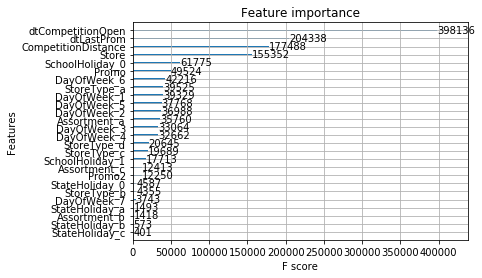

In [28]:
import matplotlib.pyplot as plt

xgb.plot_importance(gbm)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

##### 5.3 save model

In [21]:
# save model 
from shutil import copyfile
import pickle

model_dir = os.path.join('models', 'model_2')

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# this is the human readble version of the model 
gbm.dump_model(os.path.join(model_dir, 'gbm_01.raw.txt'))
gbm.save_model(os.path.join(model_dir, 'gbm_01.bin'))

# save preprocessing pipelines
with open( os.path.join(model_dir, 'pipe_X.pickle'), 'wb') as f:
    pickle.dump(pipe_union, f) 
    
with open( os.path.join(model_dir, 'pipe_Y.pickle'), 'wb') as f:
    pickle.dump(pipe_y, f) 
    

copyfile(os.path.join('notebooks', 'rossmann_03.ipynb'), os.path.join(model_dir, 'rossmann_03.ipynb'))

'models/model_2/rossmann_03.ipynb'

##### 5.4 load model

In [22]:
# load model 
gbm_loaded = xgb.Booster({'nthread': 4}) # xgb.XGBModel()  # init model
gbm_loaded.load_model(os.path.join(model_dir, 'gbm_01.bin'))  # load data

with open( os.path.join(model_dir, 'pipe_X.pickle'), 'rb') as f:
    pipe_union_loaded = pickle.load(f)
    
with open( os.path.join(model_dir, 'pipe_Y.pickle'), 'rb') as f:
    pipe_y_loaded = pickle.load(f)

### 6 Predict values

##### 6.1 train and validation

In [ ]:
from sklearn.metrics import mean_squared_error

In [23]:
Y_val_pred = pipe_y.inverse_transform( gbm.predict(xgb.DMatrix(X_val, feature_names=columns)) )
Y_train_pred = pipe_y.inverse_transform( gbm.predict(xgb.DMatrix(X_train, feature_names=columns)) )

KeyboardInterrupt: 

In [ ]:
print('rmspe_score_tr = {0:.3f} \t rmspe_score_te = {1:.3f}'.format(float(rmspe(df_train['Sales'].values, Y_train_pred)),    
                                                              float(rmspe(df_val['Sales'].values, Y_val_pred)) ))

print('rmse_score_tr = {0:.3f} \t rmse_score_te = {1:.3f}'.format(
    np.sqrt(mean_squared_error(pipe_y.transform(df_train[['Sales']].values), pipe_y.transform(Y_train_pred.reshape(-1,1)))),    
    np.sqrt(mean_squared_error(pipe_y.transform(df_val[['Sales']].values), pipe_y.transform(Y_val_pred.reshape(-1,1)))) ))

##### 6.2 test

In [24]:
from ast import literal_eval

data_dir = os.path.join('data', 'rossmann-store-sales')

df_test = pd.read_csv(os.path.join(data_dir, 'test_trf.csv'), low_memory=False)

for df in [df_test]:
    df['Date'] = pd.to_datetime(df['Date'])
    df['CompetitionSince'] = pd.to_datetime(df['CompetitionSince'])
    df['Promo2Since'] = pd.to_datetime(df['Promo2Since'])
    df['PromoInterval'] = df['PromoInterval'].apply(lambda x: literal_eval(x))
    
    date_cols = ['Date', 'Promo2Since', 'CompetitionSince']
    non_date_cols = [el for el in list(df.columns.values) if el not in date_cols]

In [25]:
df_test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Promo2Since,CompetitionSince,dtLastProm,dtCompetitionOpen
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,0,[],NaT,2008-09-01,NaN,2572.0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,1,"[1, 4, 7, 10]",2011-04-01,2006-12-01,78.0,3212.0


In [26]:
X_test = pipe_union.transform(df_test)
Y_test_pred = pipe_y.inverse_transform(gbm.predict(xgb.DMatrix(X_test, feature_names=columns))) * df_test['Open'].values

In [27]:
pd.DataFrame(data={'Id': df_test['Id'].values, 'Sales': Y_test_pred})\
    .to_csv(os.path.join(model_dir, 'predictions.csv'), index=False)

In [ ]:
# import kaggle
# kaggle competitions submit -c rossmann-store-sales -f submission.csv -m "Message"